# **Преобразование признаков. Нормализация. Стандартизация**

Операции нормализации и стандартизации также часто называют **шкалированием**.

**[Часто данные для обучения представлены в различных единицах измерения, в разном масштабе. Например, в наборе данных может быть представлен признак кадастровая стоимость недвижимости, которая измеряется в миллионах рублей, и признак понижающий коэффициент, который используется для определения налога на недвижимость и измеряется в сотых долях. Или, например, в одном наборе данных встречается признак доход клиента и стаж работы на последнем месте. Стаж в редких случаях поднимается выше 10, тогда как доход измеряется тысячами.]**

Признаки, которые измеряются в **разных масштабах**, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают **преобразование признаков**.

Рассмотрим такие преобразования, как нормализация и стандартизация.

***

### **НОРМАЛИЗАЦИЯ**

**Нормализация** — один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1].

Существует несколько способов нормализации: **MinMaxScaler, RobustScaler**.


In [2]:
# Используем библиотеку numpy для создания массивов случайных чисел различных распределений. 
import numpy as np 
import pandas as pd
from IPython.display import display

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, например, в таких наборах данных:

* Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
* Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
* Нормальное распределение, например распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации [**kdeplot()**](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. Подробнее об этой функции вы можете прочитать в [**руководстве**](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

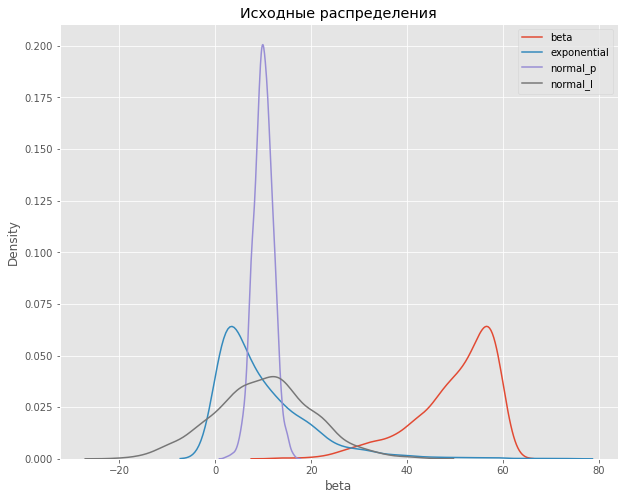

In [3]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend();

In [4]:
# Зафиксируем описательные статистики до преобразований.
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


***
##### **MINMAXSCALER**

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

1. Из каждого значения признака х вычитается минимальное значение этого признака:  x - min
2. Результат вычитания делится на разность между максимумом и минимумом признака: max - min

**x scaled = (x - xmin) / (x max - x min)**

**[Например, температура в горном посёлке за день может меняться от 10 до 35 градусов. Текущая температура составляет 17 градусов. ]**

Нормализуем это значение:

x scaled = (17 - 10) / (35 - 10) = 0,28

Нормализованное значение 0.28 лежит в диапазоне от 0 до 1, и ближе к левой границе распределения (0), что соответствует также ненормализованному распределению (значение 17 ближе к 10).

Проведём нормализацию распределений признаков из обучающего примера.

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


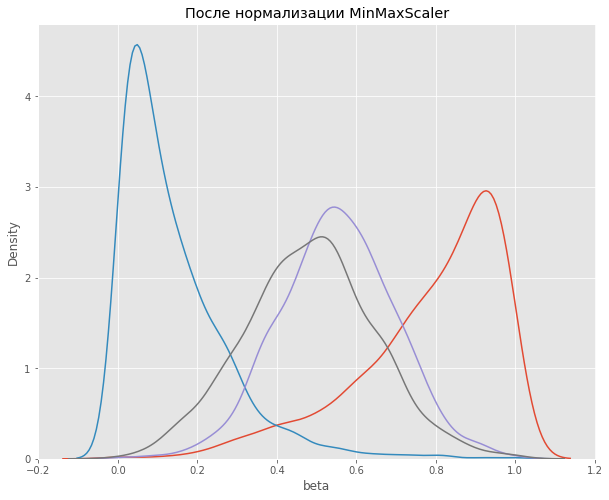

In [5]:
# Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform.

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1);

# А так выглядят описательные статистики
display(df_mm.describe())

Как мы видим, значения расположились в диапазоне от минимального 0 до максимального 1, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: скошенные влево/вправо распределения сохранили свою форму.

Теперь рассмотрим нормализацию методом **RobustScaler**, а затем сравним их.

***
##### **ROBUSTSCALER**

Нормализация методом RobustScaler происходит в несколько этапов:

1. из каждого значения признака вычитается медиана признака: x - median
2. полученное значение делится на межквартильный размах: значение 75% - значение 25%

**x scaled = (x - x median) / (IQR)**

**[Например, имеется числовой ряд [1, 2, 3, 4, 5]. Медиана ряда — 3. Межквартильный размах: 4 - 2 = 2. Мы хотим нормализовать число 4.]**

x scaled = (4 - 3) / (2) = 0,5

Таким образом, значение 4 после нормализации приняло значение 0.5.

Проведём нормализацию распределений признаков из обучающего примера, используя класс [**RobustScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


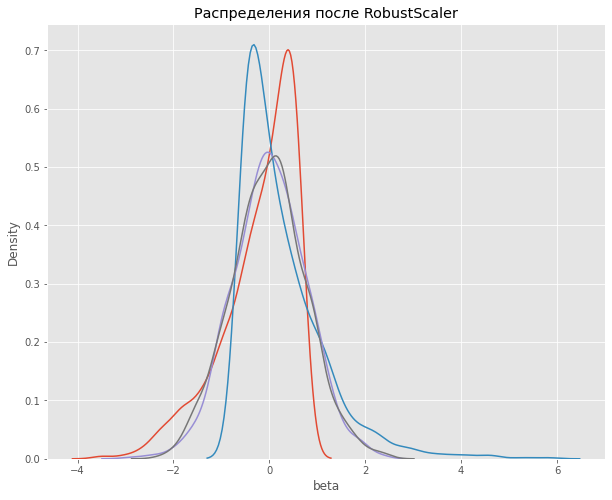

In [6]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1);

# Описательные статистики после нормализации:
display(df_r.describe())

Из описательных статистик видно, что RobustScaler **не масштабирует данные в заданный интервал**, как делает это MinMaxScaler. Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. **Они стали более нормальными**.

***
##### **В ЧЁМ РАЗНИЦА?**

Поскольку **MinMaxScaler** использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет **чувствителен к наличию выбросов в распределении**.

**RobustScaler** в вычислении использует перцентили, и поэтому **не зависит даже от большого количества выбросов**.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

Больше о других способах нормализации и их сравнении вы можете прочитать в [**официальном руководстве scikit-learn**](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

***
### **СТАНДАРТИЗАЦИЯ**

**Стандартизация** — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

**x scaled = (x - x mean) / x std**

где **x std** — стандартное отклонение

**[Например, у нас есть числовой ряд [1, 2, 3, 4, 5]. Среднее ряда: 3. Стандартное отклонение — 1.4. Нормализуем число 4.]**

x scaled = (4 - 3) / 1,4 = 0,7

Нормализованное число 4 равно 0.7.

Этот процесс можно описать как **центрирование данных с масштабированием**. Сначала происходит вычитание среднего значения из всех данных — центрирование, а затем деление на отклонение.

**ДЛЯ ЧЕГО НЕОБХОДИМО ТАКОЕ ПРЕОБРАЗОВАНИЕ?**

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако **в отличие от нормализации стандартизация предполагает, что признак распределён нормально**.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации StandardScaler в Python.

Продолжим использовать обучающий пример, сгенерированный нами при изучении нормализации данных. Стандартизируем признаки в исходном наборе данных.
***
#### **STANDARDSCALER**

Для стандартизации используем класс [**StandardScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


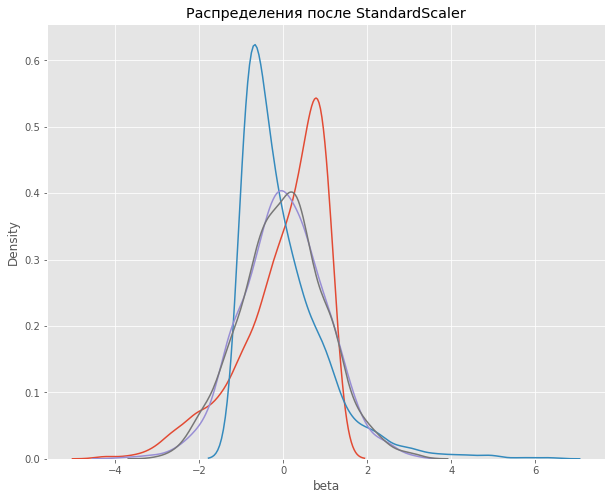

In [7]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1);

# Описательные статистики после нормализации:
display(df_s.describe())

Стандартное отклонение стало равным 1, а средние значения — 0. Распределения изменились подобно RobustScaler — стали более **нормальными**.
***
### **НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?**

Инструкция по преобразованию признаков:

* если признак распределён нормально, то его необходимо стандартизировать;
* если признак распределён ненормально, его необходимо нормализовать;
* если разброс значений небольшой, то можно обойтись без преобразования данных.

Комбинации преобразований также могут быть эффективны. Поэтому проводите эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на ваших данных.

KeyError: 'price'

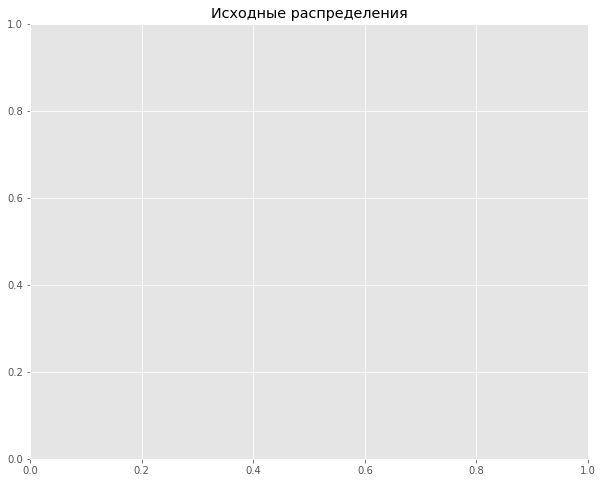

In [8]:
# В нашем датасете винных обзоров много бинарных признаков, принимающих значение 0 или 1.
# Давайте нормализуем признак price в диапазон значений от 0 до 1
# В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

data = pd.read_csv('data/wine_cleared2.csv')


# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data['price'], ax=ax1, label ='price');

# т к выбросы сильны - используем Robustscaler


,price
count,129972.000000
mean,0.334693
std,1.798952
min,-1.090909
25%,-0.454545
50%,0.000000
75%,0.545455
max,148.727273


43500.77493697044

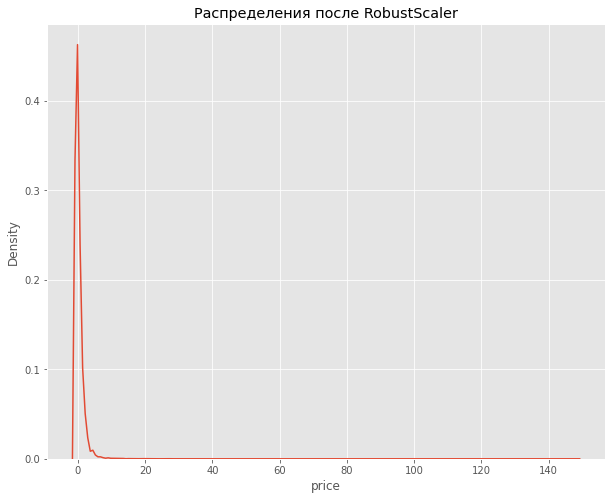

In [ ]:
# копируем исходный датасет
data_rscaler_price = r_scaler.fit_transform(data[['price']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_rscaler_price = pd.DataFrame(data_rscaler_price, columns=['price'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(data_rscaler_price['price'], ax=ax1);

# Описательные статистики после нормализации:
display(data_rscaler_price.describe())

data_rscaler_price['price'].sum()

1.0015148681208141

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country,years_diff,year.1
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.000003,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,-0.514525,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,-0.539793,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,1


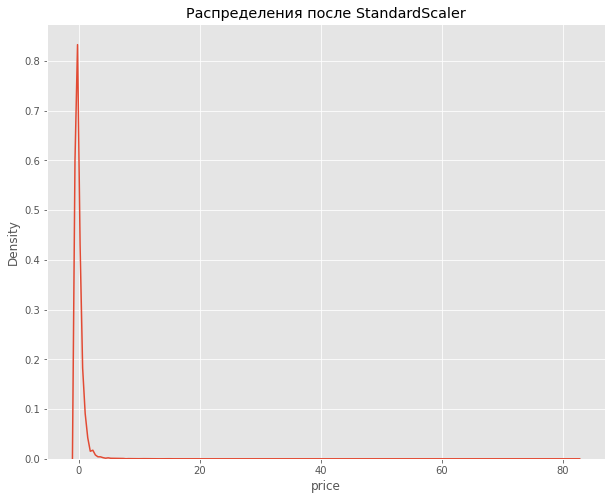

In [ ]:
# Стандартизируйте исходный признак price.
# В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
data['price'] = s_scaler.fit_transform(data[['price']])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(data['price'], ax=ax1)

# Описательные статистики после нормализации:
#display(data['price'].describe())

display(data['price'][129968])

data.head(3)